<h3>Lab 4/5: Mini-Assignment<br></h3>

# ANZ Lab Assignment

In [1]:
import numpy as np
import matplotlib.pyplot as plt

---

### Declaration

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Sunghyun(Sean) Park

Date: 07/09/2021

---

## Task

Investigate the similarities and differences between Australia and New Zealand on a demographic feature of your choice, as discussed in the accompanying assignment sheet `ANZAssign.pdf`.

---

# Comparing Dwelling Structure Data Between 
# Australia and South Korea  

# 

### Content

Australia and South Korea have very different demographic and geographic figures.  
Australia has about 25 million people in area of 7.7 million $km^2$. While, South Korea has about 50 million people in area of 0.1 million $km^2$.  
If we compare population density, 3.4 Australia people can live in $1km^2$, while 507 Korean should share $1km^2$.  

Then, how South Korea maintain such large population in small land?

Those demographic and geographic differences may lead to difference in dwelling structures. I think majority of dwelling structure in South Korea would be apartments to occupy many people in limited area, while most Australians live in separated house.  

We will explore data and see if our hypothesis is right.


### Data Acquisition

We used Australia's dwelling structure data in 2016 Census General Community Profile datapack which can be downloaded from the ABS.  
Unzip the package, and open the Metadata spreadsheet. Find the table that reports dwelling structure by household from the Census.

We used South Korea's dwelling structure data in 2015 Census Data in Korea Population and Housing Census (https://www.census.go.kr/mainView.do)  
You can find the data about dwelling structure by household very easily in Census Report category. (https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1IN1502&vw_cd=&list_id=&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=I2)


Since South Korea's data is in Korean, it must be translated into English. I uploaded two same data file, one is in Korean and the other one is in English.  
("인구__가구_및_주택__읍면동_2015_2020___시군구_20162019__20210909043404.csv", "Translated Korea Population and Housing Census.csv")

Here are some words that I translated:  
"총인구 (명),가구-계 (가구),주택-계 (호),단독주택 (호),아파트 (호),연립주택 (호),다세대주택 (호),비거주용 건물내 주택 (호),주택이외의 거처 (호)"  
"Population,Households,Dwellings,Separate House,Apartment,Row House,Row House(4 more stories),Dwelling in Commercial building,Other dwellings"


Upload the data to the directory for this assignment in CoCalc.



### Data Cleaning

Firstly, we examine the Korea's data.  
There are 3 rows of data and some of them are irrelevant to data.  
Eliminate the unnecessary data and put them into list of pairs.


In [2]:
with open('Translated Korea Population and Housing Census.csv', 'r') as kor_census:
    kor_data = kor_census.readlines()
    
del kor_data[0] # we do not need year reference

kor_cat_list = kor_data[0][:-1].split(',') # categories in kor_data, delete new line caracter
kor_num_list = kor_data[1][:-1].split(',') # statistic in kor_data, delete new line caracter

kor_total_list = []
for pair in zip(kor_cat_list,kor_num_list):
    kor_total_list.append(pair) # pair them into single list
    
del kor_total_list[0] # delete unnecessary data

# saving some information for later uses
kor_population = kor_total_list.pop(0)[1]
num_hh = int(kor_total_list.pop(0)[1])
num_ds = int(kor_total_list.pop(0)[1])

Secondly, we examine the Australia's data.  
We can clearly see that South Korea's data has much less categories.  
Therefore, Australia's data will be reduced to small range of categories since we can not make up the numbers.


In [3]:
with open('2016Census_G39_AUS.csv', 'r') as aus_census:
    aus_data = aus_census.readlines()
aus_cat_list = aus_data[0][:-1].split(',') # categories in aus_data, delete new line caracter
aus_num_list = aus_data[1].split(',') # statistic in aus_data

After skimming, we find out that every 8th column will have total number of households for that category.  
Get list of total numbers.  


In [4]:
need_index = slice(8,len(aus_cat_list),8)
aus_cat_list = aus_cat_list[need_index] # extracting required information
aus_num_list = aus_num_list[need_index] # extracting required information
print(aus_cat_list)

['SH_Tot', 'SDRTHT_1_S_Tot', 'SDRTHT_2more_S_Tot', 'SDRTHT_Tot_Tot', 'FoA_1_or_2_SB_Tot', 'FoA_3SB_Tot', 'FoA_4moSB_Tot', 'FoA_Att_to_hous_Tot', 'FoA_Tot_Tot', 'OD_C_Tot', 'OD_CH_Tot', 'OD_Imp_home_T_SO_Tot', 'OD_HorF_at_to_S_O_Tot', 'OD_Tot_Tot', 'DS_NS_Tot', 'Tot_Tot']


Now we have reduced the data to small range, so we can manually select the data that we want.

In [5]:
ind_list = [0,3,8,13,14] # manual selecting
aus_total_list = []
for i in ind_list:
    aus_total_list.append((aus_cat_list[i],aus_num_list[i])) # pair them into single list

According to South Korea Census, there are 8 categories which are 'total number of households', 'total number of households live in dwellings', 'number of households live in separated house', 'number of households live in apartment', 'number of households live in row house', 'number of households live in row house which is more than 4 stories', 'number of households live in dwelling which is built for business purpose', 'number of households live in other dwelling'.

In [6]:
print(kor_total_list)

[('Separate House', '3897729'), ('Apartment', '11661851'), ('Row House', '521606'), ('Row House(4 more stories)', '2230787'), ('Dwelling in Commercial building', '213871'), ('Other dwellings', '1000903')]


Similarly, in Australia's data we can find the number of households live in 'separate house', 'Semi-detached, row or terrace house, townhouse', 'Flat or apartment', 'Other dwelling', 'Dwelling not stated'.

In [7]:
print(aus_total_list)

[('SH_Tot', '6041788'), ('SDRTHT_Tot_Tot', '1055015'), ('FoA_Tot_Tot', '1087445'), ('OD_Tot_Tot', '64422'), ('DS_NS_Tot', '37410')]


We will adjust the data for easier comparing.  
Now, we have smaller categories in Australia's data so we are going to adjust the Korea's data.


Firstly, we will merge the data of row house since there are two row house categories.  

In [8]:
num_rh = int(kor_total_list.pop(2)[1]) # number of households live in row house
num_rh += int(kor_total_list.pop(2)[1]) # number of households live in row house with 4 more stories
kor_total_list.append(('Row house', num_rh))

Secondly, we also merge the data of households live in business building and other dwelling because Australia Census does not have business building factor.  

In [9]:
num_od = int(kor_total_list.pop(2)[1])# number of households live in business purpose building
num_od += int(kor_total_list.pop(2)[1]) # number of households live in other dwellings
kor_total_list.append(('Other dewlling', num_od))

Lastly, we'll add new category which is 'dwelling not stated'. We can calculate this by subtracting sum of households live in all dwellings from 'total number of households live in dwellings'.

In [10]:
total = 0
for info in kor_total_list:
    total += int(info[1]) # total number of households live in dwelling
kor_total_list.append(('Dwelling not stated',int(num_hh) - total)) # adding dwelling not stated info

## Data Analysis
We have done cleaning data and put them into list.  

To analyse those data, it will be easier to use other format other than list.  

First, we are going to rank statistic by using dictionary.
To put data into dictionary, we are going to create function to do this easily.

In [11]:
def into_dict(stat):
    """ this function convert list of paisrs into dictionary """
    info_dict = {}
    for info in stat:
        info_dict[info[0]] = int(info[1])
    return info_dict

Then, we create dictionaries with information.

In [12]:
aus_dict = into_dict(aus_total_list)
kor_dict = into_dict(kor_total_list)
print(aus_dict, kor_dict)

{'SH_Tot': 6041788, 'SDRTHT_Tot_Tot': 1055015, 'FoA_Tot_Tot': 1087445, 'OD_Tot_Tot': 64422, 'DS_NS_Tot': 37410} {'Separate House': 3897729, 'Apartment': 11661851, 'Row house': 2752393, 'Other dewlling': 1214774, 'Dwelling not stated': 1958038}


Now, we are going to sort them by value in descending order.

In [13]:
# sorting by values using sorted function and key 
rank_aus = dict(sorted(aus_dict.items(), key=(lambda x:x[1]), reverse = True))
rank_kor = dict(sorted(kor_dict.items(), key=(lambda x:x[1]), reverse = True))
print(rank_aus, rank_kor)

{'SH_Tot': 6041788, 'FoA_Tot_Tot': 1087445, 'SDRTHT_Tot_Tot': 1055015, 'OD_Tot_Tot': 64422, 'DS_NS_Tot': 37410} {'Apartment': 11661851, 'Separate House': 3897729, 'Row house': 2752393, 'Dwelling not stated': 1958038, 'Other dewlling': 1214774}


We have sorted dwelling structure in descending order, so it is easy to see which dwelling type is the most.  
However, it is hard to know by looking at the numbers.

It might be good idea to convert the statistic into proportion.  
Let's make Korea's data to percentage by using numpy array.

In [14]:
def np_maker(stats):
    """ 
    this function get list of statistic 
    convert them to numpy array and find the percentage of each element.
    """
    np_stats = np.array(stats)
    np_stats = np_stats / np_stats.sum() * 100
    np_stats[::-1].sort()
    return np_stats

In [15]:
np_kor = np_maker(list(rank_kor.values())) #using numpy array for fewer calculations.
print(np_kor)
print(list(rank_kor.keys()))

[54.27957971 18.14181059 12.81089385  9.11360295  5.6541129 ]
['Apartment', 'Separate House', 'Row house', 'Dwelling not stated', 'Other dewlling']


It is much easier to see which dwelling has the most proportion in the country.

Let's try for Australia's data.

In [16]:
np_aus = np_maker(list(rank_aus.values())) #using numpy array for fewer calculations.
print(np_aus)
print(list(rank_aus.keys()))

[72.91491272 13.12375695 12.73237767  0.77747258  0.45148007]
['SH_Tot', 'FoA_Tot_Tot', 'SDRTHT_Tot_Tot', 'OD_Tot_Tot', 'DS_NS_Tot']


Now we have done sorting in descending order.  
Before visualise it, we are going to standardise the categories into same format.


In [17]:
kor_dwelling_types = list(rank_kor.keys())
aus_dwelling_types = ['Separate House', 'Apartment', 'Row House', 'Other dwelling', 'Dwelling not stated'] #unifying factors

## Data Visualisation
Everything is done for comparing and visualisation.  
Let's make pie chart, since it is the most suitable type of chart to compare proportion.

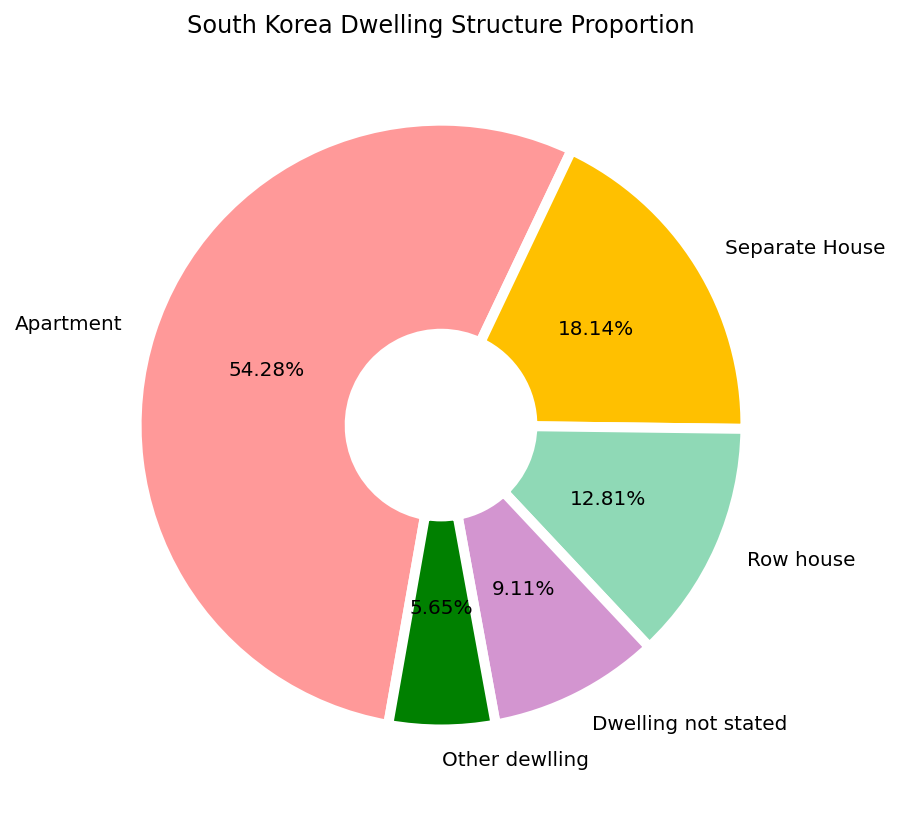

In [18]:
# this block is for detail information of pie chart
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'green']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

# plotting pie chart of Korea's data 
plt.title('South Korea Dwelling Structure Proportion')
plt.pie(np_kor, labels = kor_dwelling_types, autopct = '%.2f%%',startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()


We can clearly see that Apartment is the most popular dwelling by having more than half of proportion in Korea's dwelling structure.  
Following structure is Seperate House which has 18% and Row house has 13%, Dwelling unknown has 9% and other dewlling is 6%.  

Now, let's try Australia's data.

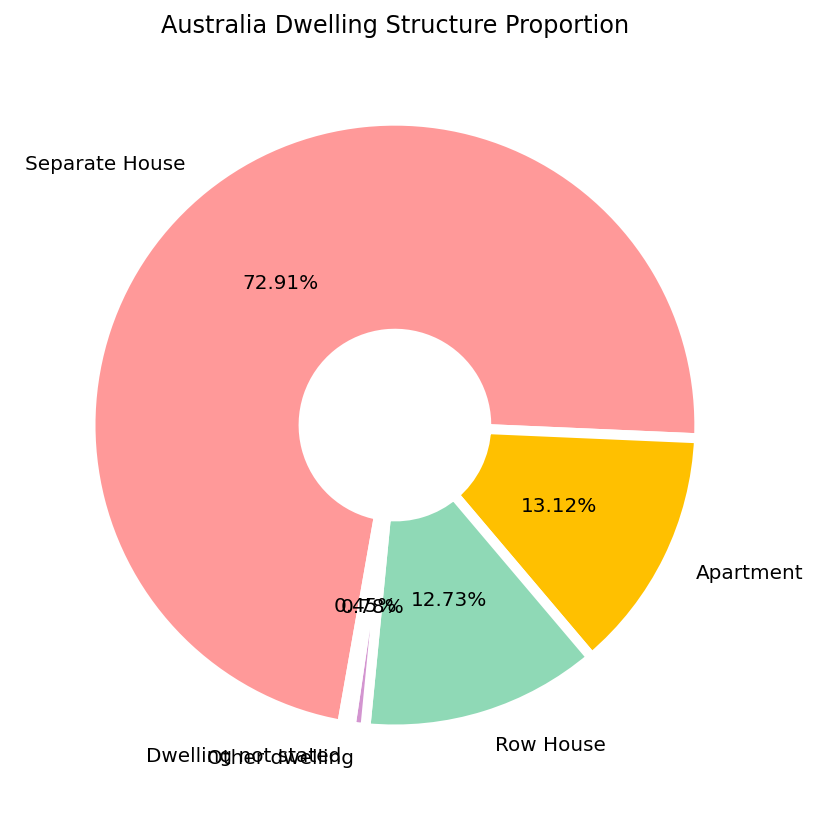

In [19]:
# plotting pie chart of Australia's data
plt.title("Australia Dwelling Structure Proportion")
plt.pie(np_aus, labels = aus_dwelling_types, autopct = '%.2f%%',startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

Well, it is hard to see the numbers and labels due to some categories.  
We need to change a type of chart to see more clearly.  

Let's try bar plot.

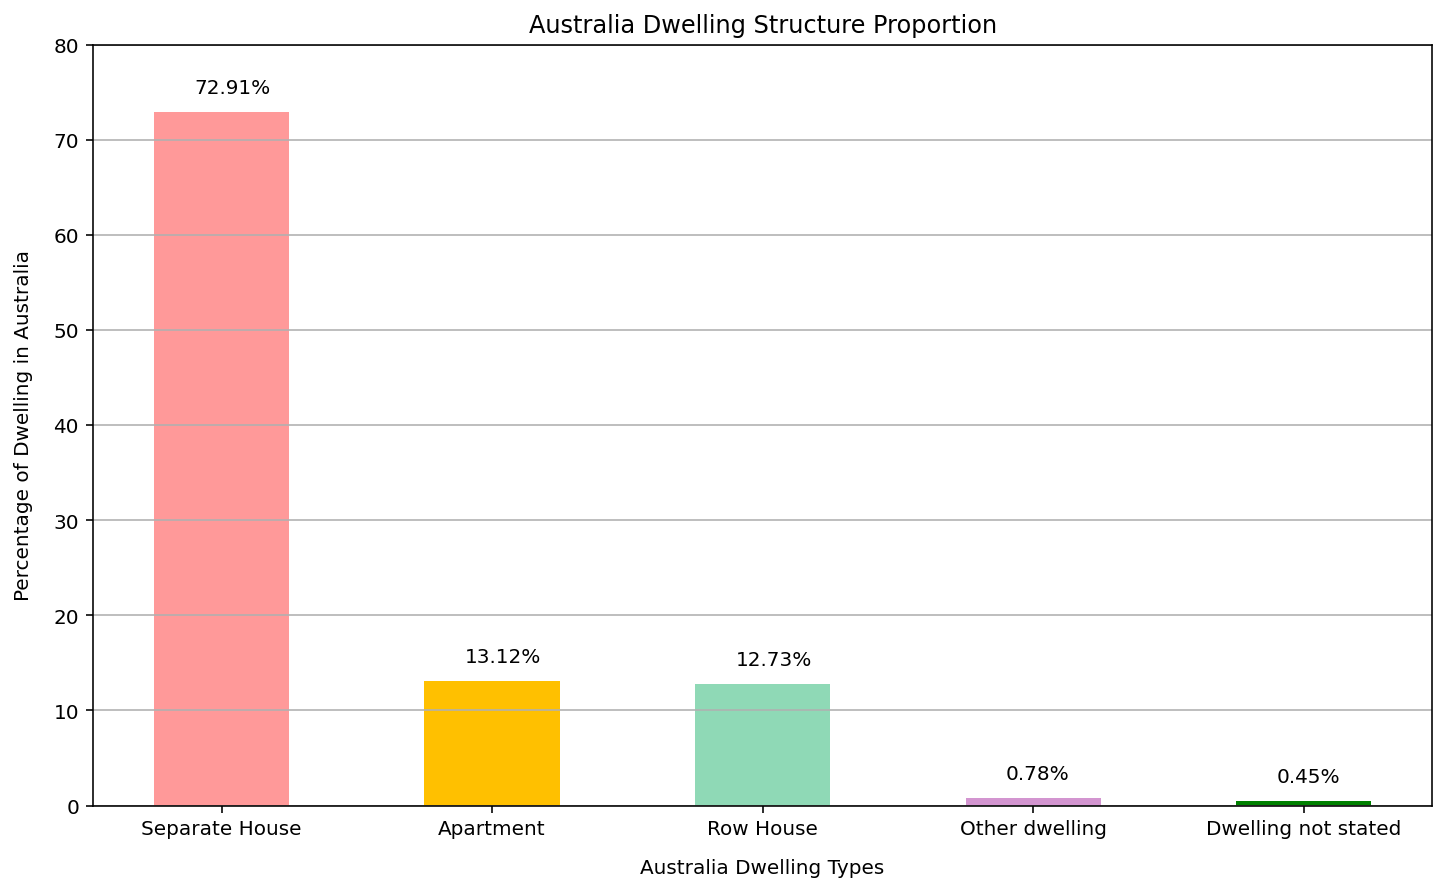

In [20]:
# detail settings of bar plot
plt.title("Australia Dwelling Structure Proportion")
plt.xlabel("Australia Dwelling Types", labelpad=10)
plt.ylabel("Percentage of Dwelling in Australia", labelpad=10)
plt.ylim([0, 80])
plt.grid(True, axis='y')

# indicating the percentage at the top of the bars
point_x = -0.1
for i in np_aus:
    plt.text(point_x, i + 2, f'{i:0.2f}%')
    point_x += 1

# plotting bar plot of Australia's data
plt.bar(aus_dwelling_types, np_aus, width = 0.5, color = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', 'green'])
plt.show()

It is very easy to see and tell which type of dwelling has the most occupancy.  
Australia's favorite dwelling structure is Separate House which has 73% of total and 13% of Apartment, 13% of Row House and less than 1% of Other dwelling and unknown.

Now, maybe it will be easier to see the difference if there are two charts in one graph

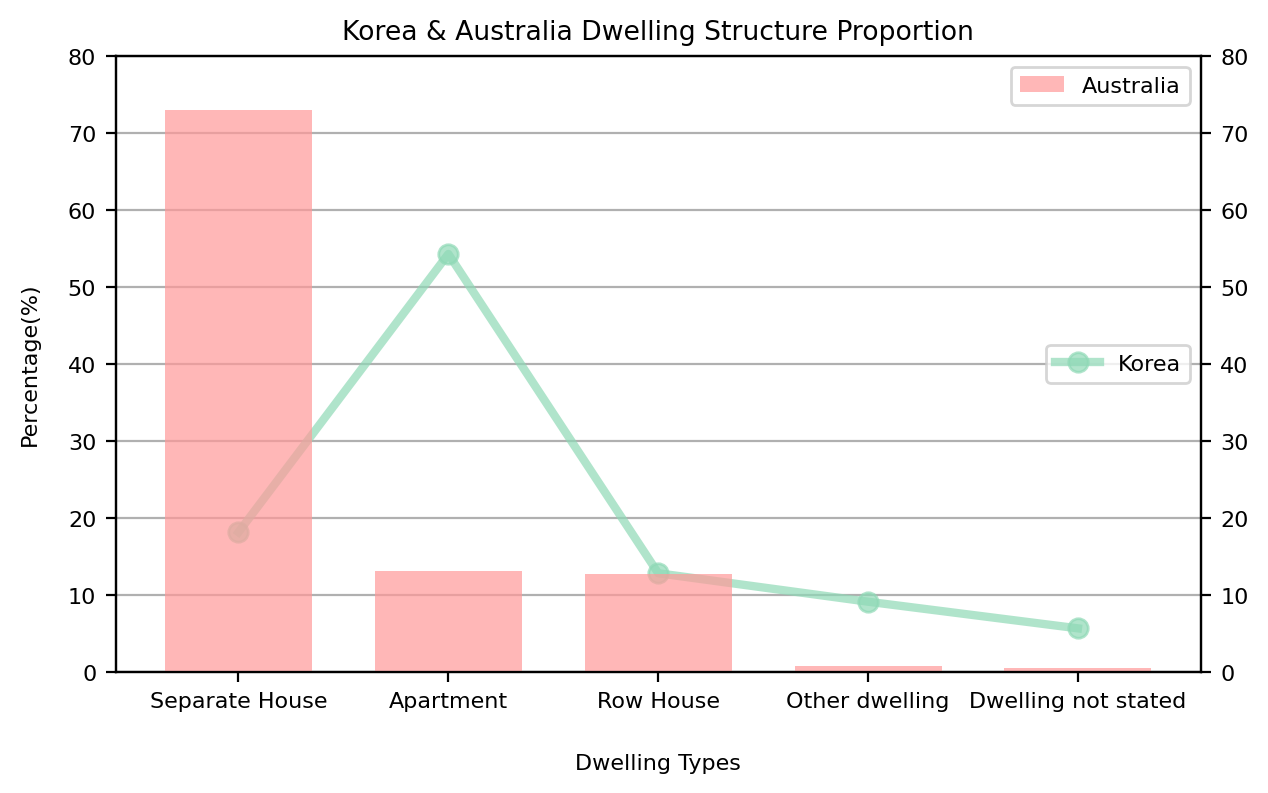

In [21]:
# 1. basic settings
plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams['font.size'] = 8

# 2. data 
x = ['Separate House', 'Apartment', 'Row House', 'Other dwelling', 'Dwelling not stated']
y1 = np.array([18.14181059, 54.27957971, 12.81089385,  9.11360295,  5.6541129 ]) # manually ordered
y2 = np_aus

# 3. plotting graph
fig, ax1 = plt.subplots()

plt.title("Korea & Australia Dwelling Structure Proportion")
plt.xlabel('Dwelling Types', labelpad=15)
plt.ylabel('Percentage(%)', labelpad=10)
plt.grid(True, axis='y')

ax1.plot(x, y1, '-o', color='#8fd9b6', markersize=7, linewidth=3, alpha=0.7, label='Korea')
ax1.set_ylim(0, 80)
ax1.legend(loc='right')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='#ff9999', label='Australia', alpha=0.7, width=0.7)
ax2.set_ylim(0, 80)
ax2.legend(loc='upper right')

plt.show()

## Conlusion

As we saw in the last graph, Australia and South Korea has significant difference in dwelling structures. About 70% of Australian households live in separate houses while more than 50% of South Korean households live in Apartments.  
It is possible to think that there are a relation between demographic and geographic figures and dwelling structures. Also, our hypothesis was quite right, since apartments are the most popular dwelling structure in South Korea.  

However, this analysis does not give us the definite answer for our hypothesis. South Korea and Australia have different ways of collecting data and their dwelling structures may differ from one to the other.  
Analysis would be more reliable if there are more countries and more standardised data.


#### Further Investigation

Additionally, we could calculate average number of people in one households.  
It may give us a clue about relationship between dwelling types and family composition.  

In [22]:
print(f"Num of Korean in a households : {int(kor_population) / sum(list(rank_kor.values()))}\nNum of Australian in a households : {25863184 / sum(list(rank_aus.values()))}")

Num of Korean in a households : 2.412364657128289
Num of Australian in a households : 3.1212809917355373
